<a href="https://colab.research.google.com/github/AINERD007/AINERD007/blob/main/Regression_and_A_B_testing_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

%matplotlib inline

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving heart_cleveland_recoded.csv to heart_cleveland_recoded.csv


In [ ]:
# sex
sex_t = pd.CategoricalDtype(categories=['M','F'], ordered=False)

# Chest pain
pain_t = pd.CategoricalDtype(categories=['Typical','Atypical','Non_anginal','Asymptomatic'], ordered=False)

# RestECG
ECG_t = pd.CategoricalDtype(categories=['Normal','ST-T wave','Hypertrophy'], ordered=False)

# ECG_ST_slope
ECG_ST_t = pd.CategoricalDtype(categories=['Upsloping', 'Flat', 'Downsloping'], ordered=False)

# Thallium uptake
Thal_t = pd.CategoricalDtype(categories=['Normal','Fixed','Reversible'], ordered=False)

# Type dictionary
types_dict = {'Sex':sex_t, 'ChestPain':pain_t, 'RestECG': ECG_t, 'ECG_ST_slope': ECG_ST_t, 'Thallium':Thal_t}

hearts = pd.read_csv('heart_cleveland_recoded.csv', dtype = types_dict)
hearts

,Age,Sex,ChestPain,RestBP,Chol,Bsugar,RestECG,MaxRate,Angina,ECG_ST_d,ECG_ST_slope,Vessels,Thallium,Disease
0,69,M,Typical,160,234,True,Hypertrophy,131,False,0.1,Flat,1,Normal,False
1,69,F,Typical,140,239,False,Normal,151,False,1.8,Upsloping,2,Normal,False
2,66,F,Typical,150,226,False,Normal,114,False,2.6,Downsloping,0,Normal,False
3,65,M,Typical,138,282,True,Hypertrophy,174,False,1.4,Flat,1,Normal,True
4,64,M,Typical,110,211,False,Hypertrophy,144,True,1.8,Flat,0,Normal,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,40,M,Asymptomatic,152,223,False,Normal,181,False,0.0,Upsloping,0,Reversible,True
293,39,M,Asymptomatic,118,219,False,Normal,140,False,1.2,Flat,0,Reversible,True
294,35,M,Asymptomatic,120,198,False,Normal,130,True,1.6,Flat,0,Reversible,True
295,35,F,Asymptomatic,138,183,False,Normal,182,False,1.4,Upsloping,0,Normal,False


array([[<Axes: title={'center': 'MaxRate'}>]], dtype=object)

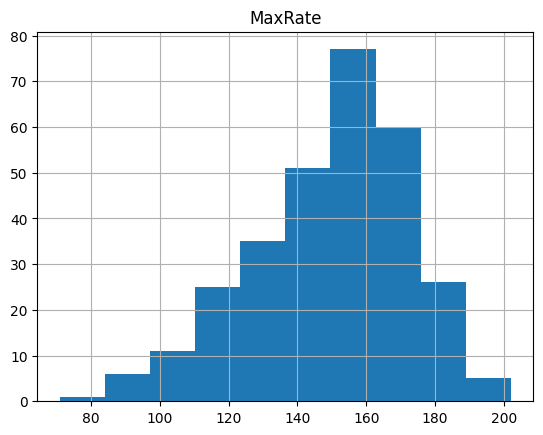

In [ ]:
hearts.hist(column='MaxRate')

array([[<Axes: title={'center': 'Age'}>]], dtype=object)

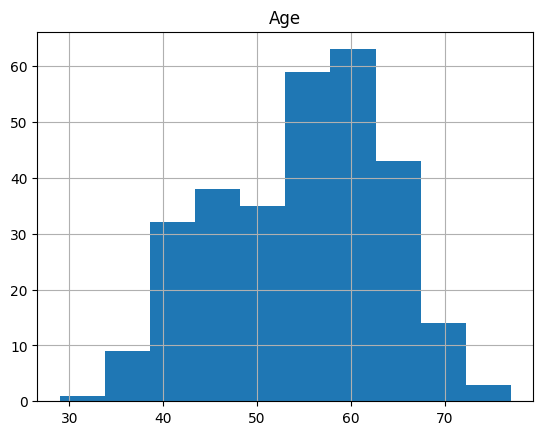

In [ ]:
hearts.hist(column='Age')

array([[<Axes: title={'center': 'RestBP'}>]], dtype=object)

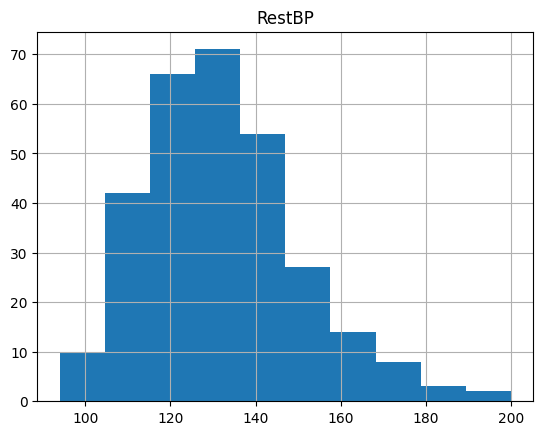

In [ ]:
hearts.hist(column='RestBP')

<Axes: xlabel='RestBP', ylabel='MaxRate'>

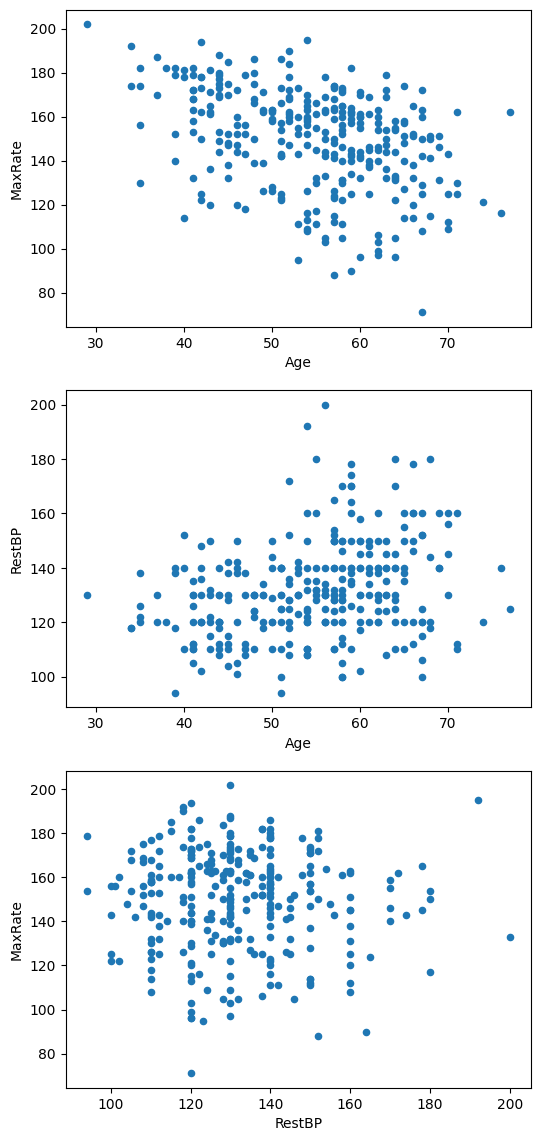

In [ ]:
fig, (a1,a2,a3) = plt.subplots(3, 1, figsize=(6,14))
#plt.scatter(y = hearts.MaxRate, x= hearts.Age, ax=a1)
hearts.plot(kind='scatter',  x='Age', y='MaxRate', ax=a1)
hearts.plot(kind='scatter',  x='Age', y='RestBP', ax=a2)
hearts.plot(kind='scatter',  x='RestBP', y='MaxRate', ax=a3)


In [ ]:
y = hearts.MaxRate # this is the target variable; we assue just one though more are possible
X = np.column_stack((hearts.Age,hearts.RestBP))
X[0:5]

array([[ 69, 160],
       [ 69, 140],
       [ 66, 150],
       [ 65, 138],
       [ 64, 110]])

In [ ]:
reg = LinearRegression().fit(X, y)
print('The R2 coefficient of determination is %4.3f' % reg.score(X, y))
print('The intercept is %4.1f' % reg.intercept_)
beta_Age, beta_RestBP = reg.coef_
print('Estimated regression coefficient for Age is %4.2f' % beta_Age,
      'change of max heart rate (beats / min) per year')
print('Estimated regression coefficient for RestBP is %4.2f' % beta_RestBP,
      'change of max heart rate (beats / min) per mmHg')

The R2 coefficient of determination is 0.160
The intercept is 194.9
Estimated regression coefficient for Age is -1.05 change of max heart rate (beats / min) per year
Estimated regression coefficient for RestBP is 0.09 change of max heart rate (beats / min) per mmHg


In [ ]:
'Estimated regression coefficient for Age is %4.2f' % beta_Age + \
      ' change of max heart rate (beats / min) per year'

'Estimated regression coefficient for Age is -1.05 change of max heart rate (beats / min) per year'

In [ ]:
age_range = hearts.Age.quantile(0.9) - hearts.Age.quantile(0.1)
BP_range = hearts.RestBP.quantile(0.9) - hearts.RestBP.quantile(0.1)
rate_range = hearts.MaxRate.quantile(0.9) - hearts.MaxRate.quantile(0.1)

print('Age range (10th to 90th centile) is %3.1f' % age_range, 'years')
print('BP range (10th to 90th centile) is %3.1f' % BP_range, 'mmHg')
print('Max rate range (10th to 90th centile) is %3.1f' % rate_range, 'beats / min')

Age range (10th to 90th centile) is 24.0 years
BP range (10th to 90th centile) is 42.8 mmHg
Max rate range (10th to 90th centile) is 61.4 beats / min


In [ ]:
print ('The change in Max Rate (as a percent of its range) given by the age coefficient (over its range) is %4.1f percent'
       % (100 * (beta_Age * age_range) / rate_range))

print ('The change in Max Rate (as a percent of its range) given by the BP coefficient (over its range) is %4.1f percent'
       % (100 * (beta_RestBP * BP_range) / rate_range))

The change in Max Rate (as a percent of its range) given by the age coefficient (over its range) is -41.2 percent
The change in Max Rate (as a percent of its range) given by the BP coefficient (over its range) is  6.4 percent


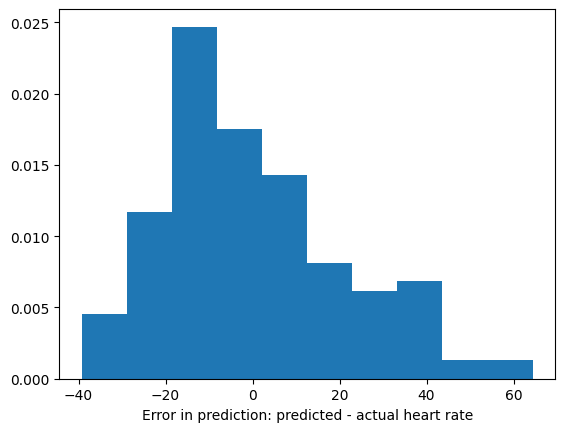

In [ ]:
y_hat = reg.predict(X)

fig, a1 = plt.subplots(1, 1)
residuals = y_hat - y
a1.hist(residuals, bins=10, density=True)
_ = a1.set_xlabel('Error in prediction: predicted - actual heart rate')

In [ ]:
# The mean squared error
print('Root of the mean squared error: %.2f'% mean_squared_error(y, y_hat, squared=False))

Root of the mean squared error: 20.99


Text(0, 0.5, 'Actual Value')

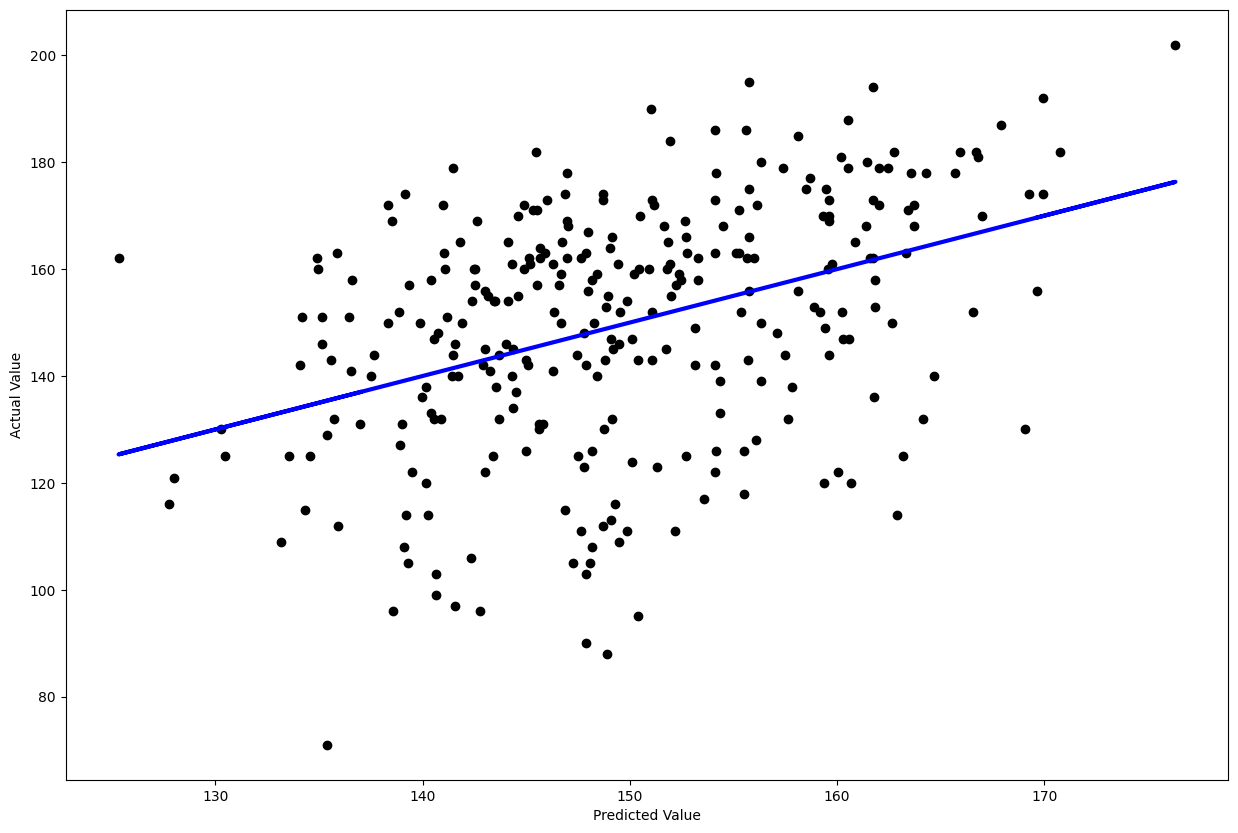

In [ ]:
# Plot outputs
fig, a = plt.subplots(1,1,figsize=(15,10))
a.scatter(y_hat, y,  color='black')
a.plot(y_hat, y_hat, color='blue', linewidth=3)

# two_std = residuals.std() * 2
# a.errorbar(y_hat, y, yerr=two_std, fmt='.k')

a.set_xlabel('Predicted Value')
a.set_ylabel('Actual Value')

In [ ]:
Z = StandardScaler().fit_transform(X)

reg1 = LinearRegression().fit(Z, y)
print('The R2 coefficient of determination is %4.3f' % reg.score(X, y))
print('The intercept is %4.1f' % reg1.intercept_)
beta_AgeT, beta_RestBPT = reg1.coef_
print('Estimated regression coefficient for standardised Age is %4.2f' % beta_AgeT)
print('Estimated regression coefficient for standardised RestBP is %4.2f' % beta_RestBPT)

The R2 coefficient of determination is 0.160
The intercept is 149.6
Estimated regression coefficient for standardised Age is -9.51
Estimated regression coefficient for standardised RestBP is 1.64


In [ ]:
CPain_d = pd.get_dummies(hearts.ChestPain, drop_first=True)
CPain_d

,Atypical,Non_anginal,Asymptomatic
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
...,...,...,...
292,0,0,1
293,0,0,1
294,0,0,1
295,0,0,1


In [ ]:
X2 = np.column_stack((hearts.Age,hearts.RestBP, CPain_d.Atypical, CPain_d.Non_anginal, CPain_d.Asymptomatic))
reg2 = LinearRegression().fit(X2, y)
print('The R2 coefficient of determination is %4.3f' % reg2.score(X2, y))
print('The intercept is %4.1f' % reg2.intercept_)
print('The regression coefficients are:', reg2.coef_)

The R2 coefficient of determination is 0.272
The intercept is 194.7
The regression coefficients are: [ -0.91766338   0.08884194   3.67843688  -1.27757522 -14.66178106]


In [2]:
import numpy as np
import scipy.stats as stats

Here's an example of how to conduct an A/B test for a website's conversion rate using Python. In this example, we'll simulate the A/B test using random data, but you can apply the same principles to real-world data.
In this code, we simulate data for a control group (A) and a treatment group (B) with different conversion rates. We then calculate the z-score and p-value to determine whether the difference in conversion rates is statistically significant. Finally, we interpret the results based on the p-value and the significance level.

Note that this is a simplified example using simulated data. In a real-world scenario, you would need to collect actual data from your website and perform the A/B test using appropriate statistical tools. Additionally, consider using libraries like scipy.stats for more accurate statistical calculations.


In [3]:
# Simulate data for control group (A) and treatment group (B)
np.random.seed(42)
sample_size_A = 1000
sample_size_B = 1000

conversion_rate_A = 0.1  # Conversion rate for control group
conversion_rate_B = 0.12  # Conversion rate for treatment group

successes_A = np.random.binomial(n=sample_size_A, p=conversion_rate_A)
successes_B = np.random.binomial(n=sample_size_B, p=conversion_rate_B)

In [4]:
# Perform A/B test
alpha = 0.05  # Significance level

In [5]:
# Calculate conversion rates
conversion_rate_estimate_A = successes_A / sample_size_A
conversion_rate_estimate_B = successes_B / sample_size_B

In [6]:

# Calculate standard errors
se_A = np.sqrt(conversion_rate_estimate_A * (1 - conversion_rate_estimate_A) / sample_size_A)
se_B = np.sqrt(conversion_rate_estimate_B * (1 - conversion_rate_estimate_B) / sample_size_B)

In [7]:
# Calculate z-score
z_score = (conversion_rate_estimate_B - conversion_rate_estimate_A) / np.sqrt(se_A**2 + se_B**2)

In [8]:
# Calculate p-value
p_value = 1 - stats.norm.cdf(z_score)

In [9]:

# Compare p-value to significance level
if p_value < alpha:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")

Reject the null hypothesis


In [10]:
# Interpret the results
if conversion_rate_estimate_B > conversion_rate_estimate_A:
    print("The treatment group (B) has a higher conversion rate.")
else:
    print("There is no significant difference in conversion rates between the groups.")

The treatment group (B) has a higher conversion rate.


In [ ]:
import numpy as np
import scipy.stats as stats

# Simulated data for two groups (A and B)
np.random.seed(42)
group_A = np.random.normal(loc=100, scale=15, size=100)  # Group A data
group_B = np.random.normal(loc=105, scale=15, size=100)  # Group B data

# Perform A/B testing
t_statistic, p_value = stats.ttest_ind(group_A, group_B)

# Set significance level
alpha = 0.05

# Check the null hypothesis
if p_value < alpha:
    print("Reject the null hypothesis")
    print("There is a significant difference between Group A and Group B")
else:
    print("Fail to reject the null hypothesis")
    print("There is no significant difference between Group A and Group B")

# Print the results
print("T-statistic:", t_statistic)
print("P-value:", p_value)


**Hypothesis testing**

In [11]:
import numpy as np
import scipy.stats as stats

In [12]:
# Simulated data for two groups (A and B)
np.random.seed(42)
group_A = np.random.normal(loc=100, scale=15, size=100)  # Group A data
group_B = np.random.normal(loc=105, scale=15, size=100)  # Group B data


In [13]:
# Perform A/B testing
t_statistic, p_value = stats.ttest_ind(group_A, group_B)

In [14]:
# Set significance level
alpha = 0.05

In [16]:

# Check the null hypothesis
if p_value < alpha:
    print("Reject the null hypothesis")
    print("There is a significant difference between Group A and Group B")
else:
    print("Fail to reject the null hypothesis")
    print("There is no significant difference between Group A and Group B")

Reject the null hypothesis
There is a significant difference between Group A and Group B


In [17]:
# Print the results
print("T-statistic:", t_statistic)
print("P-value:", p_value)

T-statistic: -3.489107943590808
P-value: 0.0005972138330187973


We start by simulating two groups of data, representing two scenarios (A and B) that we want to compare. In this example, we're comparing the average performance of two groups.

We use the scipy.stats.ttest_ind function to perform an independent two-sample t-test, which is commonly used for A/B testing. This calculates the t-statistic and the p-value.

We set a significance level (alpha) of 0.05, which is a common choice in hypothesis testing.

We compare the p-value with the significance level. If the p-value is less than alpha, we reject the null hypothesis and conclude that there is a significant difference between the two groups. Otherwise, we fail to reject the null hypothesis and conclude that there is no significant difference.

Finally, we print the t-statistic, p-value, and the outcome of the hypothesis test.